# MIE 1624 Introduction to Data Science and Analytics

# Final Exam Project

Name: Jiani Jia

Student ID: 1002226245

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import date
import scipy.integrate as spi
import numpy as np
import pylab as pl
from scipy.integrate import odeint
from scipy import integrate, optimize
import warnings

#https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv

In [4]:
rawUS = pd.read_csv('time_series_covid19_confirmed_US.csv', index_col = 0)
rawUS.head()

,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,...,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20
UID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2229,2244,2257,2286,2307,2328,2328,2351,2385,2417,2435,2456,2481,2506,2529,2554,2580,2597,2617,2634,2661,2686,2704,2716,2735,2751,2780,2818,2873,2893,2945,2979,3005,3043,3087,3117,3186,3233,3258,3300
84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7093,7133,7184,7226,7263,7345,7348,7409,7454,7523,7596,7646,7696,7772,7849,7933,8038,8131,8199,8269,8376,8473,8576,8603,8733,8820,8890,9051,9163,9341,9501,9626,9728,9821,9974,10087,10288,10489,10665,10806
84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1079,1089,1092,1095,1098,1107,1107,1112,1113,1117,1123,1128,1130,1134,1137,1145,1151,1157,1160,1161,1167,1170,1170,1171,1173,1175,1178,1189,1206,1214,1217,1219,1223,1224,1240,1245,1258,1264,1269,1272
84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,907,920,926,934,942,948,948,961,966,973,978,986,993,1004,1008,1011,1024,1036,1136,1142,1157,1162,1170,1173,1179,1188,1196,1204,1239,1252,1270,1283,1293,1299,1317,1322,1359,1398,1417,1441
84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2233,2258,2290,2302,2338,2378,2378,2400,2429,2488,2518,2549,2574,2594,2648,2683,2704,2735,2754,2763,2822,2855,2879,2888,2922,2946,2997,3061,3100,3158,3231,3281,3299,3324,3426,3496,3600,3663,3744,3776


In [5]:
rawglobal = pd.read_csv('time_series_covid19_confirmed_global.csv')
rawglobal.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,41814,41935,41975,42033,42159,42297,42463,42609,42795,42969,43035,43240,43468,43681,43924,44177,44363,44503,44706,44988,45174,45384,45600,45723,45844,46116,46274,46516,46718,46837,46837,47072,47306,47516,47716,47851,48053,48116,48229,48527
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,22300,22721,23210,23705,24206,24731,25294,25801,26211,26701,27233,27830,28432,29126,29837,30623,31459,32196,32761,33556,34300,34944,35600,36245,36790,37625,38182,39014,39719,40501,41302,42148,42988,43683,44436,45188,46061,46863,47742,48530
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,59527,60169,60800,61381,62051,62693,63446,64257,65108,65975,66819,67679,68589,69591,70629,71652,72755,73774,74862,75867,77000,78025,79110,80168,81212,82221,83199,84152,85084,85927,86730,87502,88252,88825,89416,90014,90579,91121,91638,92102
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5045,5135,5135,5319,5383,5437,5477,5567,5616,5725,5725,5872,5914,5951,6018,6066,6142,6207,6256,6304,6351,6428,6534,6610,6610,6712,6745,6790,6842,6904,6955,7005,7050,7084,7127,7162,7190,7236,7288,7338
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11813,12102,12223,12335,12433,12680,12816,12953,13053,13228,13374,13451,13615,13818,13922,14134,14267,14413,14493,14634,14742,14821,14920,15008,15087,15103,15139,15251,15319,15361,15493,15536,15591,15648,15729,15804,15925,16061,16161,16188


In [6]:
rawglobalDeath = pd.read_csv('time_series_covid19_deaths_global.csv')
rawglobalDeath.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1559,1565,1577,1580,1584,1594,1598,1608,1620,1635,1641,1648,1653,1666,1678,1690,1702,1715,1728,1737,1740,1752,1774,1795,1822,1841,1846,1846,1864,1874,1900,1906,1919,1935,1945,1956,1965,1969,1995,2011
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,557,559,571,579,590,598,605,612,623,631,637,646,657,672,685,699,716,735,743,753,771,787,798,810,822,839,852,870,889,905,922,936,951,965,977,989,1003,1016,1028,1040
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2036,2048,2062,2077,2093,2111,2124,2139,2154,2168,2186,2206,2224,2236,2255,2272,2294,2309,2329,2352,2372,2393,2410,2431,2447,2464,2480,2492,2501,2516,2527,2539,2554,2564,2575,2584,2596,2609,2623,2631
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,75,75,75,75,75,75,75,75,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,77,77,78,78,78,78,78,78,78,78,79,79,79,79
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,303,307,308,308,312,315,317,322,322,324,328,332,333,334,336,337,337,338,340,341,342,345,346,348,350,351,352,353,354,354,354,355,358,362,365,366,371,372,372,379


In [7]:
rawglobalRecover = pd.read_csv('time_series_covid19_recovered_global.csv')
rawglobalRecover.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,34446,34458,34721,34954,34967,35024,35036,35067,35092,35137,35160,35295,35350,35370,35422,35934,35976,36122,36145,36232,36295,36709,36716,36831,36946,37218,37260,37260,37393,37685,37879,37920,38032,38099,38141,38200,38250,38252,38336,38475
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12002,12092,12203,12353,12493,12574,12667,12767,12889,13453,13804,14216,14565,15055,15469,15842,16230,16666,17031,17352,17755,18152,18481,18849,19384,19912,20484,20974,21286,21617,22180,22527,23072,23609,24136,24520,24820,24820,25876,26381
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,41783,42037,42325,42626,42980,42980,43779,44199,44633,45148,45148,46326,46962,47581,48183,48794,49421,50070,50712,51334,51946,52568,53204,53809,54405,54990,55538,56079,56617,57146,57648,58146,58146,59135,59590,60028,60457,60888,61307,61700
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4043,4248,4332,4405,4488,4585,4675,4675,4747,4830,4965,5055,5127,5239,5290,5358,5405,5503,5542,5649,5710,5710,5794,5873,5940,5988,6066,6130,6171,6238,6293,6367,6452,6505,6598,6629,6629,6706,6706,6819
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5647,5899,5927,6036,6125,6250,6326,6345,6444,6523,6582,6623,7062,7117,7273,7346,7351,7444,7517,7617,7697,7763,7763,7851,7932,8139,8244,8299,8335,8338,8353,8470,8579,8679,8798,8841,8898,8924,8990,9194


In [8]:
TotalPop = pd.read_csv('UID_ISO_FIPS_LookUp_Table.csv')
TotalPop.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.93911,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.15330,20.168300,Albania,2877800.0
2,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.03390,1.659600,Algeria,43851043.0
3,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.50630,1.521800,Andorra,77265.0
4,24,AO,AGO,24.0,NaN,NaN,NaN,Angola,-11.20270,17.873900,Angola,32866268.0


In [9]:
# Drop last three days until 12/10/20
rawglobal = rawglobal.drop(rawglobal[rawglobal.columns[-3:]], axis = 1)
rawglobalDeath = rawglobalDeath.drop(rawglobalDeath[rawglobalDeath.columns[-6:]], axis = 1)
rawglobalRecover = rawglobalRecover.drop(rawglobalRecover[rawglobalRecover.columns[-6:]], axis = 1)

In [10]:
# Find comfirm, recovery, death and total population in Canada
rawCanadaComfirm = rawglobal[rawglobal['Country/Region'] == 'Canada']
rawCanadaDeath = rawglobalDeath[rawglobalDeath['Country/Region'] == 'Canada']
rawCanadaRecover = rawglobalRecover[rawglobalRecover['Country/Region'] == 'Canada']
CanadaPop = TotalPop[TotalPop['Country_Region'] == 'Canada']

In [11]:
data  = {'Confirmed Cases': rawCanadaComfirm.sum()
         }
rawCanadaConfirm = pd.DataFrame(data).T
dataDeath  = {'Death Cases': rawCanadaDeath.sum()
         }
rawCanadaDeath = pd.DataFrame(dataDeath).T

In [12]:
# Canada total population
CanadaPop = CanadaPop.iloc[0]['Population']

# 1 Data Cleaning

In [13]:
# Recover people in Canada
CanadaRecover = rawCanadaRecover.drop(rawCanadaRecover[rawCanadaRecover.columns[0:4]], axis = 1)
CanadaRecover

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20
39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,3,3,3,3,3,3,6,6,6,6,...,200768,203128,206691,208815,210429,214441,216338,218279,221758,224912,226826,230429,234404,236870,240434,244699,248859,253089,257310,261754,265568,269137,274315,278191,281883,285672,291221,295475,299095,304595,309557,314529,319250,324802,329676,334375,344034,349629,355401,361020


In [14]:
# Confirm people in Canada
CanadaConfirm = rawCanadaConfirm.drop(rawCanadaConfirm[rawCanadaConfirm.columns[0:4]], axis = 1)
CanadaConfirm

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20
Confirmed Cases,0,0,0,0,1,1,2,2,2,4,4,4,4,4,5,5,7,7,7,7,7,7,7,7,7,7,8,8,8,8,9,9,9,10,11,11,13,14,20,24,...,239649,243178,247916,250698,253482,258875,263221,267165,272036,276481,280465,285939,290709,295139,299440,305473,309935,314453,319247,324234,329191,333936,340731,346013,350971,356650,362604,368279,373662,381557,387052,393506,399770,406189,412543,418848,426572,432743,439142,445828


In [15]:
# Death people in Canada
CanadaDeath = rawCanadaDeath.drop(rawCanadaDeath[rawCanadaDeath.columns[0:4]], axis = 1)
CanadaDeath

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20
Death Cases,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10230,10262,10334,10385,10432,10493,10547,10575,10620,10693,10748,10828,10885,10947,11001,11075,11136,11238,11314,11385,11455,11502,11570,11676,11733,11818,11916,11993,12046,12147,12229,12342,12423,12519,12607,12688,12796,12887,13009,13130


In [16]:
# Daily confirmed cases in Canada
CanadaConfirmDaily = CanadaConfirm.transpose().diff(axis=0).transpose()
CanadaConfirmDaily[CanadaConfirmDaily.columns[0]] = 0.0
CanadaConfirmDaily

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20
Confirmed Cases,0.0,0,0,0,1,0,1,0,0,2,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,2,1,6,4,...,2336,3529,4738,2782,2784,5393,4346,3944,4871,4445,3984,5474,4770,4430,4301,6033,4462,4518,4794,4987,4957,4745,6795,5282,4958,5679,5954,5675,5383,7895,5495,6454,6264,6419,6354,6305,7724,6171,6399,6686


In [17]:
data  = {'Date': CanadaConfirmDaily.columns.tolist(), 
         'COVID19 cases': CanadaConfirmDaily.iloc[0].tolist()
}
CanadaConfirmDailyNew = pd.DataFrame(data)
CanadaConfirmDailyNew

,Date,COVID19 cases
0,1/22/20,0.0
1,1/23/20,0.0
2,1/24/20,0.0
3,1/25/20,0.0
4,1/26/20,1.0
...,...,...
319,12/6/20,6305.0
320,12/7/20,7724.0
321,12/8/20,6171.0
322,12/9/20,6399.0


In [18]:
# CanadaConfirmDaily['Date']= pd.to_datetime(CanadaConfirmDaily['Date'],dayfirst=False)
# CanadaConfirmDaily.T

# 2 Data Visualization and Exploratory Data Analysis

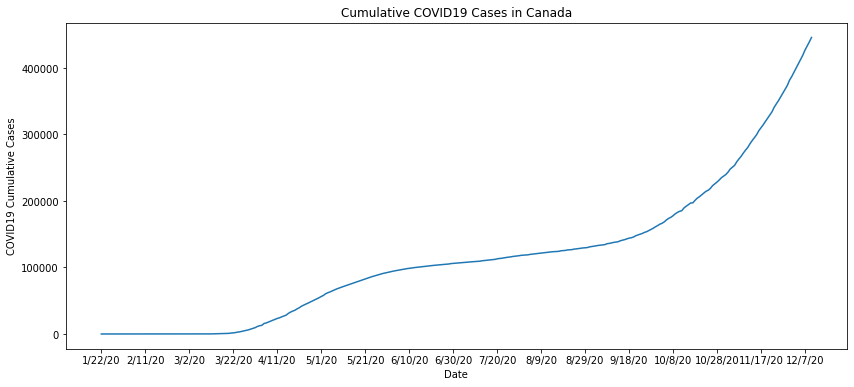

In [19]:
# Cumulative plot
plt.figure(figsize=(14,6))
plt.plot(CanadaConfirm.transpose())
tick_spacing = 20
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.title('Cumulative COVID19 Cases in Canada')
plt.xlabel('Date')
plt.ylabel('COVID19 Cumulative Cases')
plt.show()

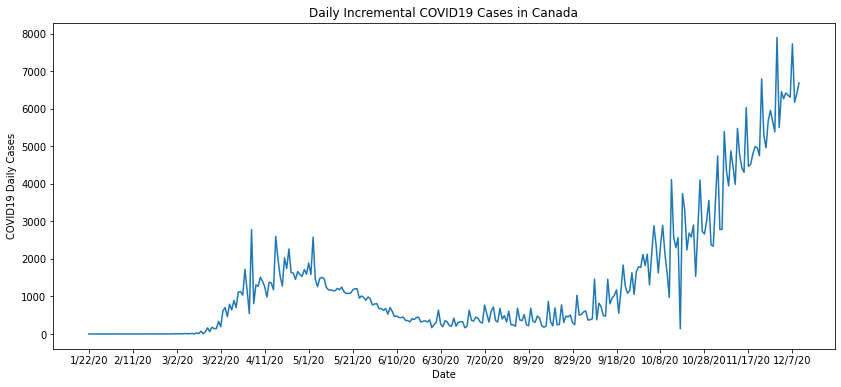

In [20]:
# Daily plot
plt.figure(figsize=(14,6))
plt.plot(CanadaConfirmDaily.T)
tick_spacing = 20
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.title('Daily Incremental COVID19 Cases in Canada')
plt.xlabel('Date')
plt.ylabel('COVID19 Daily Cases')
plt.show()

In [21]:
# Dates of interest in Canada 
# Source: https://www.cp24.com/news/a-timeline-of-events-in-canada-s-fight-against-covid-19-1.5231865
# https://www.mccarthy.ca/en/insights/articles/covid-19-recovery-and-re-opening-tracker

# First COVID19 case in Canada 1/25/20
disasterdecleration = ((date(2020, 1, 25) - date(2020, 1, 22)).days)

# Ontario state of emergency: 3/17/20 55
ontariostateofemergency = ((date(2020, 3, 17) - date(2020, 1, 22)).days)

# Canada close all shared border 3/21/20
closeallborder = ((date(2020, 3, 21) - date(2020, 1, 22)).days)

# Ontario closure of all non-essential businesse: 3/23/20
ontarioworkathome = ((date(2020, 3, 23) - date(2020, 1, 22)).days)

# 14 days quarantine 3/25/20
fourteenquarantine = ((date(2020, 3, 25) - date(2020, 1, 22)).days)

# BC reopen school at 6/1/20
bcreopenschool = ((date(2020, 6, 1) - date(2020, 1, 22)).days)

# Ontario phase 2 reopen 6/12/20
ontariopahse2reopen = ((date(2020, 6, 12) - date(2020, 1, 22)).days)

# Quebec mask policy 7/18/20
quebecmackpolicy = ((date(2020, 7, 18) - date(2020, 1, 22)).days)

# Ontario phase 3 reopen begin: 7/31/20 
ontariophase3reopen = ((date(2020, 7, 31) - date(2020, 1, 22)).days)

# Quebec reopen most of places: 8/5/20
quebecreopen = ((date(2020, 8, 5) - date(2020, 1, 22)).days)

# Second wave of COVID19 pandemic 9/18/20
secondwave = ((date(2020, 9, 18) - date(2020, 1, 22)).days)

# Quebec fine rule 10/1/20
quebecfinerule = ((date(2020, 10, 1) - date(2020, 1, 22)).days)

# Ontario mask policy: 10/2/20 
ontariomaskpolicy = ((date(2020, 10, 2) - date(2020, 1, 22)).days)

# Ontario extend phase2 to 12/21/20: 11/20/20 
ontarioextendphase2 = ((date(2020, 11, 22) - date(2020, 1, 22)).days)

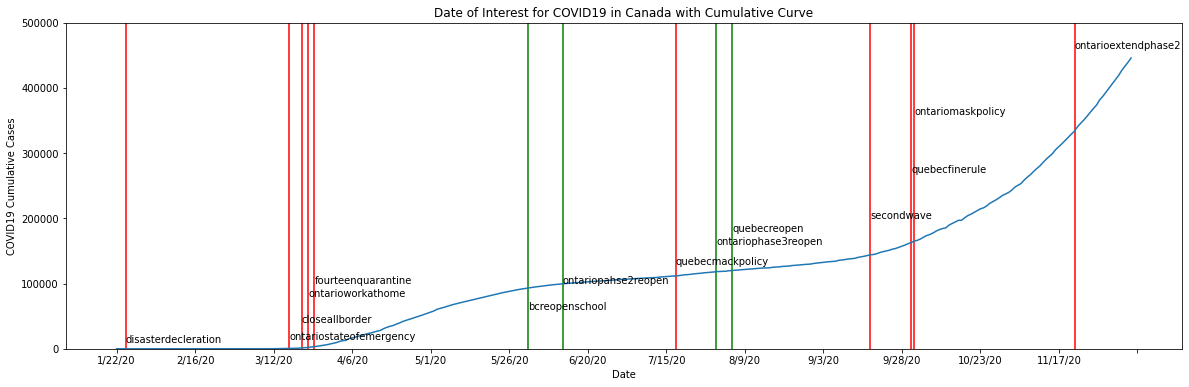

In [22]:
plt.figure(figsize=(20,6))
plt.ylim([0, 500000])
plt.plot(CanadaConfirm.transpose(), label="Cumulative")
tick_spacing = 25
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.vlines(disasterdecleration, 0, 500000, colors ="red") 
plt.text(x=disasterdecleration, y=10000, s="disasterdecleration")

plt.vlines(ontariostateofemergency, 0, 500000, colors ="red") 
plt.text(x=ontariostateofemergency, y=15000, s="ontariostateofemergency")

plt.vlines(closeallborder, 0, 500000, colors ="red") 
plt.text(x=closeallborder, y=40000, s="closeallborder")

plt.vlines(ontarioworkathome, 0, 500000, colors ="red") 
plt.text(x=ontarioworkathome, y=80000, s="ontarioworkathome")

plt.vlines(fourteenquarantine, 0, 500000, colors ="red") 
plt.text(x=fourteenquarantine, y=100000, s="fourteenquarantine")

plt.vlines(bcreopenschool, 0, 500000, colors ="green")
plt.text(x=bcreopenschool, y=60000, s="bcreopenschool")

plt.vlines(ontariopahse2reopen, 0, 500000, colors ="green")
plt.text(x=ontariopahse2reopen, y=100000, s="ontariopahse2reopen")

plt.vlines(quebecmackpolicy, 0, 500000, colors ="red")
plt.text(x=quebecmackpolicy, y=130000, s="quebecmackpolicy")

plt.vlines(ontariophase3reopen, 0, 500000, colors ="green")
plt.text(x=ontariophase3reopen, y=160000, s="ontariophase3reopen")

plt.vlines(quebecreopen, 0, 500000, colors ="green")
plt.text(x=quebecreopen, y=180000, s="quebecreopen")

plt.vlines(secondwave, 0, 500000, colors ="red")
plt.text(x=secondwave, y=200000, s="secondwave")

plt.vlines(quebecfinerule, 0, 500000, colors ="red")
plt.text(x=quebecfinerule, y=270000, s="quebecfinerule")

plt.vlines(ontariomaskpolicy, 0, 500000, colors ="red")
plt.text(x=ontariomaskpolicy, y=360000, s="ontariomaskpolicy")

plt.vlines(ontarioextendphase2, 0, 500000, colors ="red")
plt.text(x=ontarioextendphase2, y=460000, s="ontarioextendphase2")

plt.title('Date of Interest for COVID19 in Canada with Cumulative Curve')
plt.xlabel('Date')
plt.ylabel('COVID19 Cumulative Cases')
plt.show()

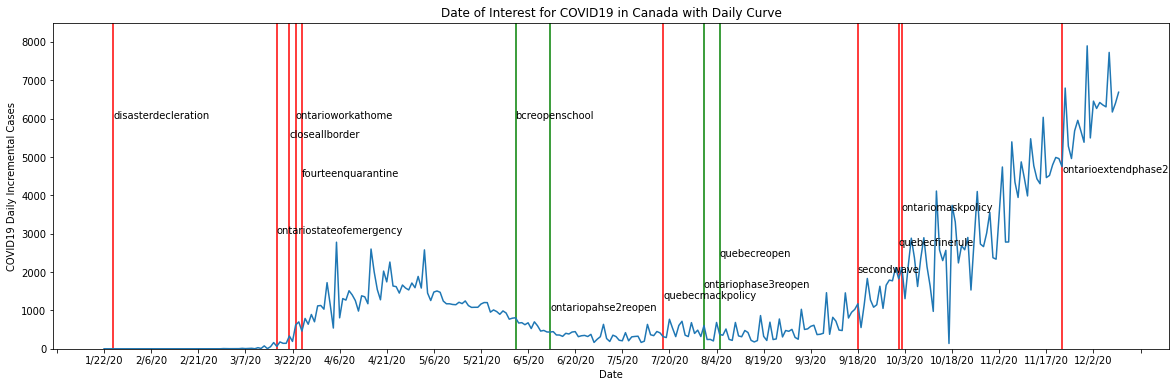

In [23]:
plt.figure(figsize=(20,6))
plt.ylim([0, 8500])
plt.plot(CanadaConfirmDaily.T, label="Daily")
tick_spacing = 15
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.vlines(disasterdecleration, 0, 10000, colors ="red") 
plt.text(x=disasterdecleration, y=6000, s="disasterdecleration")

plt.vlines(ontariostateofemergency, 0, 10000, colors ="red") 
plt.text(x=ontariostateofemergency, y=3000, s="ontariostateofemergency")

plt.vlines(closeallborder, 0, 10000, colors ="red") 
plt.text(x=closeallborder, y=5500, s="closeallborder")

plt.vlines(ontarioworkathome, 0, 10000, colors ="red") 
plt.text(x=ontarioworkathome, y=6000, s="ontarioworkathome")

plt.vlines(fourteenquarantine, 0, 10000, colors ="red") 
plt.text(x=fourteenquarantine, y=4500, s="fourteenquarantine")

plt.vlines(bcreopenschool, 0, 10000, colors ="green")
plt.text(x=bcreopenschool, y=6000, s="bcreopenschool")

plt.vlines(ontariopahse2reopen, 0, 10000, colors ="green")
plt.text(x=ontariopahse2reopen, y=1000, s="ontariopahse2reopen")

plt.vlines(quebecmackpolicy, 0, 10000, colors ="red")
plt.text(x=quebecmackpolicy, y=1300, s="quebecmackpolicy")

plt.vlines(ontariophase3reopen, 0, 10000, colors ="green")
plt.text(x=ontariophase3reopen, y=1600, s="ontariophase3reopen")

plt.vlines(quebecreopen, 0, 10000, colors ="green")
plt.text(x=quebecreopen, y=2400, s="quebecreopen")

plt.vlines(secondwave, 0, 10000, colors ="red")
plt.text(x=secondwave, y=2000, s="secondwave")

plt.vlines(quebecfinerule, 0, 10000, colors ="red")
plt.text(x=quebecfinerule, y=2700, s="quebecfinerule")

plt.vlines(ontariomaskpolicy, 0, 10000, colors ="red")
plt.text(x=ontariomaskpolicy, y=3600, s="ontariomaskpolicy")

plt.vlines(ontarioextendphase2, 0, 510000, colors ="red")
plt.text(x=ontarioextendphase2, y=4600, s="ontarioextendphase2")

plt.title('Date of Interest for COVID19 in Canada with Daily Curve')
plt.xlabel('Date')
plt.ylabel('COVID19 Daily Incremental Cases')
plt.show()

****
**How could these trends be used to help with the task of methodically extracting all information and trends of this type?**

- I present four plots here, the first one is the cumulative COVID19 cases in Canada and the third plot label the COVID19 related date on the cumulative plot. The second one is te daily incremental curve and the final plot label the important date on the daily curve. 
- It is clear to see that between 2020-3-12 to 2020-7-31, there is a peak and then goes down. And after that, we are facing the second peak, the data shows until now the Canada is not reach to its peak value, the daily confirm cases are still shown an increase trend.
- At the beginning of COVID19, lots of policies promulgated include close the border, school and university shutdown, work at home, etc. After that, the incremental confirm cases reach the peak within a month and continuously decrease. When the daily incremental number keep in a low level, the reopen and back to school policies promulgated. Then the second wave come, although more protective rules are promulgated, the second wave still growth fast and much higher than the first peak.
- From the experience of facing the first peak, the corresponding policies should be announced at the beginning of the increase trend occur to fast the speed to reach the peak value.
****

# 3 Model selection and fitting to data

**The SIR epidemic model:**

S(t) are those susceptible but not yet infected with the disease;
I(t) is the number of infectious individuals;
R(t) are those individuals who have recovered from the disease and now have immunity to it.


**Parameters:**

- β is the transmission rate and incorporates the encounter rate between susceptible and infectious individuals together with the probability of transmission.
- γ is called the removal or recovery rate, though often we are more interested in its reciprocal (1/γ) which determines the average infectious period.
- S(0) is the initial proportion of the population that are susceptible
- I(0) is the initial proportion of the population that are infectious
- R(0) = β / γ, it is the effective transmission rate, defaulting to a constant, larger R0 will effect more people have been infected before.
- If the R0 value is greater than one, the infection rate is greater than the recovery rate, and thus the infection will grow throughout the population. If R0 is less than one, the infection quickly will die out since people are healing faster than they are spreading it.



**Verify β and γ and predict the cases in the period of the first COVID 19 case to 2020-12-10.**

**Assumption:**
- There are no inbound or outbound infected travellers during this period
- Recovery people will not infect again
- R0 is constant

**Assume R0 is constant, based on the research, which analysis the time path of infected people under different assumptions for R0.**
- The result shows lower effective transmission rates defer the peak of infections, also result the lower peak value.
- The range of R0 value in the analysis is between 1.6 to 3.0.
- For example, if there is a lockdown policy the transmission rate will be low, if no one wear mask the transmission rate will be high.

In [24]:
warnings.filterwarnings("ignore")

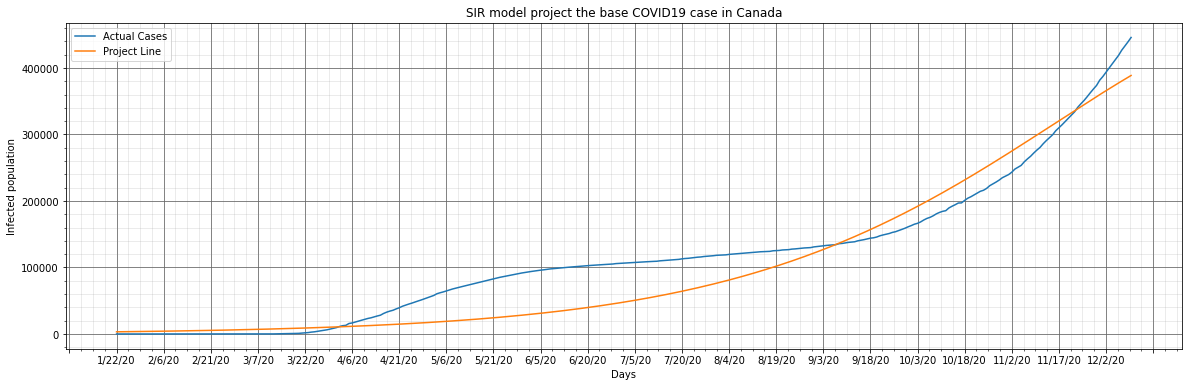

Best: beta = 0.10952268477854119  and gamma =  0.0926045690262076


In [26]:
# Base Case project COVID19 cases from day 200 8/9/20
# Source: https://zhuanlan.zhihu.com/p/148227521 Section 2.2
SIR_df = pd.DataFrame()
SIR_df['Confirmed'] =  np.array(CanadaConfirm.iloc[0])
SIR_df = SIR_df[0:]
SIR_df['Day'] = list(range(0, len(SIR_df)))

ydata = [i for i in SIR_df['Confirmed']]
xdata = SIR_df.Day
ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)

N = CanadaPop
I0 = SIR_df['Confirmed'][63]
S0 = N - I0
R0 = 2.4

def sir_model(y, x, beta, gamma):
  S = -beta * y[0] * y[1] / N
  R = gamma * y[1]
  I = -(S + R)
  return S, I, R

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (S0, I0, R0), x, args=(beta, gamma))[:,1]

popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata, maxfev=500000)
fitted = fit_odeint(xdata, *popt)

fig = plt.figure(figsize=(20,6))
plt.plot(CanadaConfirm.columns.tolist(), ydata, label='Actual Cases')
plt.plot(CanadaConfirm.columns.tolist(), fitted, label='Project Line')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#888888', linestyle='-', alpha=0.2)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(15))
plt.title("SIR model project the base COVID19 case in Canada")
plt.ylabel("Infected population")
plt.xlabel("Days")
plt.legend()
plt.show()
print("Best: beta =", popt[0], " and gamma = ", popt[1])

****
**Parameters for base project: beta = 0.1096, gamma =  0.0926, initial number of infectious individuals choose as the comfirmed number at 2020-3-25, and the R0 is 2.4, which is a medium value of transmission rate. Since at that time, the infect number in Canada is at the first rise trend not that much and school and university already close in most proviences, and state of emergency was anncounced in Ontario. I think the infection in that time is suitable to be the base case for projection.**

**From above base case plot, the projection is first under the actual curve, then at round date 2020-9-10 the projection is upper than the actual curve and around 2020-11-24 it lower than actual again. The base projection predict the average path for the COVID19 cases incremental. The prediction here focuses on showing the trend in the near future using the SIR model.**

**The validity of the results relies on the associated assumptions of the SIR model which may be violated. For instance, unreported cases as well as the inbound and outbound travelers would make the model fitting flawed. Due to the limited testing capacity, the daily reported cumulative number of confirmed cases can differ from the predicted number with a notable discrepancy.**
****

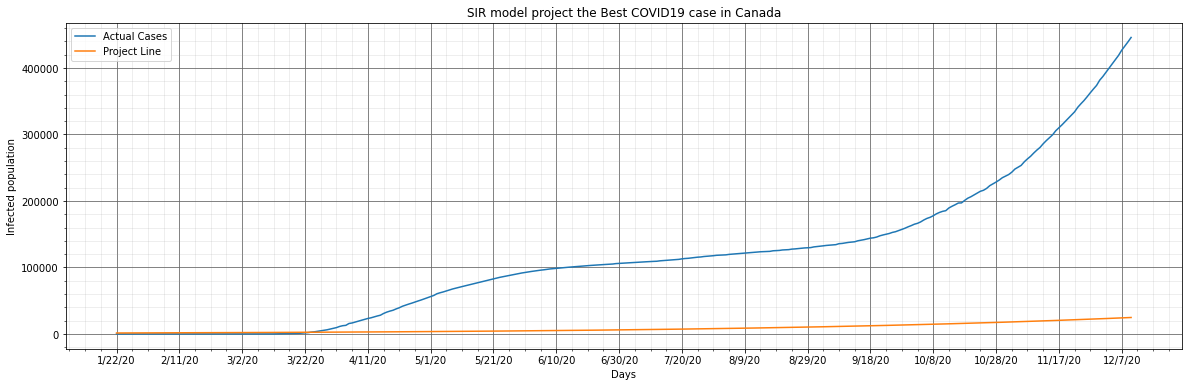

In [357]:
# Best case
SIR_df = pd.DataFrame()
SIR_df['Confirmed'] =  np.array(CanadaConfirm.iloc[0])
SIR_df = SIR_df[0:]
SIR_df['Day'] = list(range(1, len(SIR_df)+1))

ydata = [i for i in SIR_df['Confirmed']]
xdata = SIR_df.Day
ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)

N = CanadaPop
I0 = SIR_df['Confirmed'][60]
S0 = N - I0
R0 = 1

def sir_model(y, x, beta, gamma):
  S = -beta * y[0] * y[1] / N
  R = gamma * y[1]
  I = -(S + R)
  return S, I, R

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (S0, I0, R0), x, args=(beta, gamma))[:,1]

fitted = fit_odeint(xdata, beta=0.109, gamma=0.1)
fig = plt.figure(figsize=(20,6))
plt.plot(CanadaConfirm.columns.tolist(), ydata, label='Actual Cases')
plt.plot(CanadaConfirm.columns.tolist(), fitted, label='Project Line')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
tick_spacing = 20
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.title("SIR model project the Best COVID19 case in Canada")
plt.ylabel("Infected population")
plt.xlabel("Days")
plt.legend()
plt.show()

****
**Parameters for best project: beta = 0.1096, gamma = 0.1, initial number of infectious individuals is setting as the confirm cases after several days after close all border , and the initial recovery is 1. Government has a policy to prevent the outside COVID19 cases come into Canada and people follow the policies like wear mask, stay at home, etc. The infection will not growth that much based on the assumption of the best projection.**

**From above best case plot, the projection line is much lower than the actual line, and shows a slow-growth trend, after almost one year, the cumulative COVID19 cases in Canada is not over than 50000 people.**
****

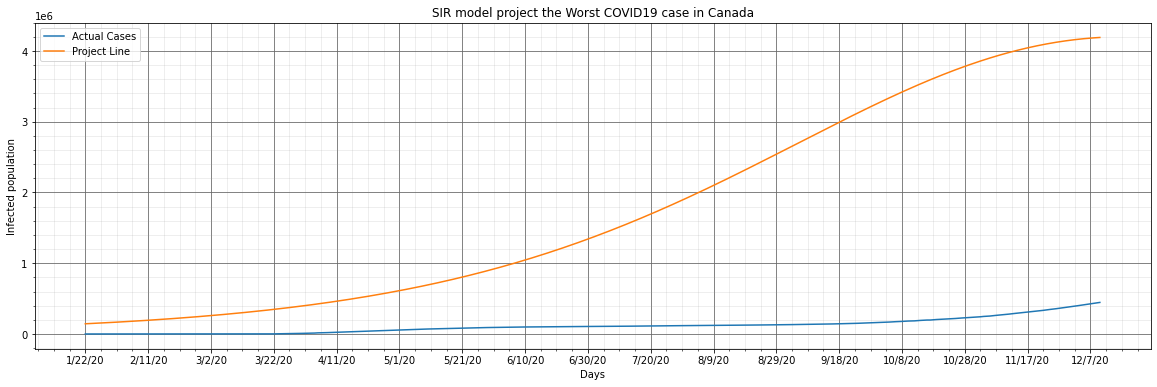

In [371]:
# Worst case using beta=0.035 gamma=0.02
SIR_df = pd.DataFrame()
SIR_df['Confirmed'] =  np.array(CanadaConfirm.iloc[0])
SIR_df = SIR_df[0:]
SIR_df['Day'] = list(range(1, len(SIR_df)+1))

ydata = [i for i in SIR_df['Confirmed']]
xdata = SIR_df.Day
ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)

N = CanadaPop
# I0 = ydata[0]
I0 = SIR_df['Confirmed'][240]
S0 = N - I0
R0 = 3.0

def sir_model(y, x, beta, gamma):
  S = -beta * y[0] * y[1] / N
  R = gamma * y[1]
  I = -(S + R)
  return S, I, R

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (S0, I0, R0), x, args=(beta, gamma))[:,1]

fitted = fit_odeint(xdata, beta=0.035, gamma=0.02)
fig = plt.figure(figsize=(20,6))
plt.plot(CanadaConfirm.columns.tolist(), ydata, label='Actual Cases')
plt.plot(CanadaConfirm.columns.tolist(), fitted, label='Project Line')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
tick_spacing = 20
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.title("SIR model project the Worst COVID19 case in Canada")
plt.ylabel("Infected population")
plt.xlabel("Days")
plt.legend()
plt.show()

****
**Parameters for worst project: beta = 0.035, gamma = 0.02, initial number of infectious is setting as the confirm cases in the governmant announce that the second wave of epidemic comes, and R0 is setting as 3.0 which is a high level transmission rate. At that time, the confirm cases show a fast increase trend, some people do not wear mask, most than one parade per every week, shopping malls are filled with people. The protective policies are not playing their roles.**

**From above worst case plot, the projection line is much higher than the actual line, and shows a fast-growth trend, after almost one year, almost everyone in Canada will be infecter, this is the worst projection in this epidemic disease.**
****

# 4 Relating COVID-19 Projections to a Second Dataset

In [359]:
rawCanadaComfirm = rawglobal[rawglobal['Country/Region'] == 'Canada']
countryName = rawCanadaComfirm['Province/State']
data  = {'Confirm cases': rawCanadaComfirm.iloc[:,-1].tolist(), 
         'Province': countryName.tolist()

}
countryComfirm = pd.DataFrame(data)
countryComfirm

,Confirm cases,Province
0,75054,Alberta
1,40060,British Columbia
2,0,Diamond Princess
3,13,Grand Princess
4,19947,Manitoba
5,546,New Brunswick
6,354,Newfoundland and Labrador
7,15,Northwest Territories
8,1393,Nova Scotia
9,229,Nunavut


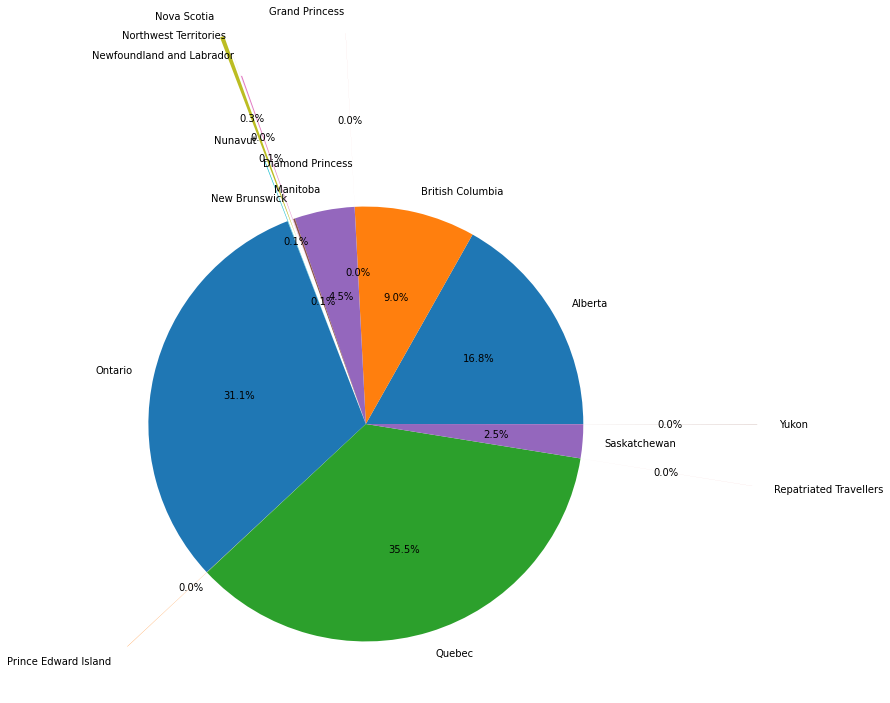

In [360]:
labels = countryComfirm['Province'].T
explodeTuple = (0.0, 0.0, 0.1, 0.8, 0.0, 0.0, 0.7, 0.8, 0.9, 0.3, 0, 0.5, 0.0, 0.8, 0.0, 0.8)
fig = plt.figure(figsize=(10,10))
plt.pie(countryComfirm['Confirm cases'].T, labels=labels, explode=explodeTuple, autopct='%1.1f%%')
plt.show()

****

**From above pir plot, the cumulative confirm cases in Quebec until 2020-12-10 is the highest province in Canada, 35.5% of confirm cases come from here, so at part 4 I would like to analysis the COVID19 in Quebec.**

****

In [361]:
# Confirm cumulative cases in Quebec
rawCanadaComfirm = rawglobal[rawglobal['Country/Region'] == 'Canada']
QuebecConfirm = rawCanadaComfirm[rawCanadaComfirm['Province/State'] == 'Quebec']
QuebecConfirm

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20
51,Quebec,Canada,52.9399,-73.5491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,106981,108018,108889,109918,111056,112189,113423,114820,115989,117151,118529,119894,121195,122643,123854,125072,126054,127233,128440,129699,130888,132042,133206,134330,135430,136894,138163,139643,141038,142371,143548,145062,146532,147877,149908,151599,153176,154740,156468,158310


In [364]:
QuebecConfirm = QuebecConfirm.drop(QuebecConfirm[QuebecConfirm.columns[0:4]], axis = 1)

In [366]:
# Confirm daily cases in Quebec
QuebecConfirmDaily = QuebecConfirm.transpose().diff(axis=0).transpose()
QuebecConfirmDaily[QuebecConfirmDaily.columns[0]] = 0.0
QuebecConfirmDaily

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20
51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,965.0,1037.0,871.0,1029.0,1138.0,1133.0,1234.0,1397.0,1169.0,1162.0,1378.0,1365.0,1301.0,1448.0,1211.0,1218.0,982.0,1179.0,1207.0,1259.0,1189.0,1154.0,1164.0,1124.0,1100.0,1464.0,1269.0,1480.0,1395.0,1333.0,1177.0,1514.0,1470.0,1345.0,2031.0,1691.0,1577.0,1564.0,1728.0,1842.0


In [235]:
# Death cases in Quebec
rawCanadaDeath = rawglobalDeath[rawglobalDeath['Country/Region'] == 'Canada']
QuebecDeath = rawCanadaDeath[rawCanadaDeath['Province/State'] == 'Quebec']
QuebecDeath

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20
51,Quebec,Canada,52.9399,-73.5491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6272,6283,6317,6350,6378,6403,6431,6440,6455,6493,6515,6557,6586,6611,6626,6651,6675,6710,6744,6774,6806,6829,6842,6887,6915,6947,6984,7021,7033,7056,7084,7125,7155,7183,7231,7255,7277,7313,7349,7382


In [242]:
# Total population in Quebec
QuebecPop = TotalPop[TotalPop['Province_State'] == 'Quebec']['Population']

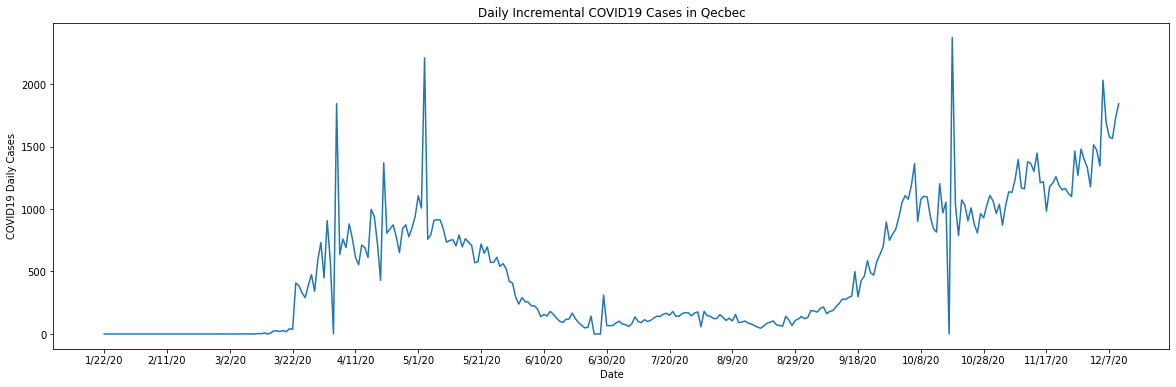

In [474]:
# Daily plot
plt.figure(figsize=(20,6))
plt.plot(QuebecConfirmDaily.T)
tick_spacing = 20
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.title('Daily Incremental COVID19 Cases in Qecbec')
plt.xlabel('Date')
plt.ylabel('COVID19 Daily Cases')
plt.show()

In [372]:
# Dates of interest and policy in Quebec
# Source: https://montreal.ctvnews.ca/covid-19-in-quebec-a-timeline-of-key-dates-and-events-1.4892912

# First COVID19 case in Quebec 2/27/20
firstcase = ((date(2020, 2, 27) - date(2020, 1, 22)).days)

# Set up quaratine 3/2/20 
setupquaratine = ((date(2020, 3, 2) - date(2020, 1, 22)).days)

# Flight cancellation 3/10/20
flightcancel = ((date(2020, 3, 10) - date(2020, 1, 22)).days)

# Close school and lockdown 3/13/20
lockdown = ((date(2020, 3, 13) - date(2020, 1, 22)).days)

# Restarant shutdown at 3/22/20
restarantshutdown = ((date(2020, 3, 22) - date(2020, 1, 22)).days)

# State of emergency in Quebec 3/27/20
quebecstateofemergency = ((date(2020, 3, 27) - date(2020, 1, 22)).days)

# Crackdown of gatherings 4/2/20
crackdownofgatherings = ((date(2020, 4, 2) - date(2020, 1, 22)).days)

# Restart economy 4/28/20
restarteconomy = ((date(2020, 4, 28) - date(2020, 1, 22)).days)

# Reopen tourism 6/11/20
reopentourism = ((date(2020, 6, 11) - date(2020, 1, 22)).days)

# Reopen indoor sports facilities 6/22/20
reopenindoorsports = ((date(2020, 6, 22) - date(2020, 1, 22)).days)

# Mask require 7/13/20
maskrequire = ((date(2020, 7, 13) - date(2020, 1, 22)).days)

# Fine to refuse wear mask 9/10/20
finerefusemask = ((date(2020, 9, 10) - date(2020, 1, 22)).days)

# Exposure notifiction appliaction: COVID 19 Alert 10/6/20
alertapp = ((date(2020, 10, 6) - date(2020, 1, 22)).days)

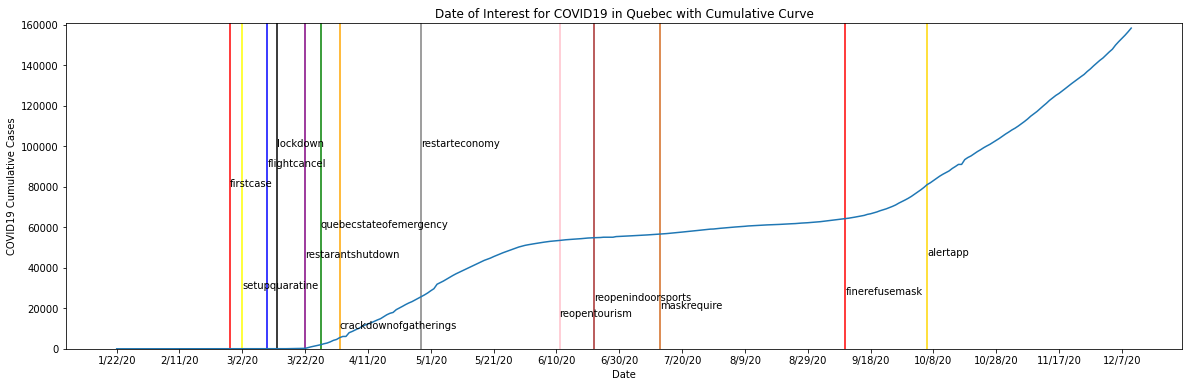

In [389]:
plt.figure(figsize=(20,6))
top_range = 161000
plt.ylim([0, top_range])
plt.plot(QuebecConfirm.T)
tick_spacing = 20
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.vlines(firstcase, 0, top_range, colors ="red") 
plt.text(x=firstcase, y=80000, s="firstcase")

plt.vlines(setupquaratine, 0, top_range, colors ="yellow") 
plt.text(x=setupquaratine, y=30000, s="setupquaratine")

plt.vlines(flightcancel, 0, top_range, colors ="blue") 
plt.text(x=flightcancel, y=90000, s="flightcancel")

plt.vlines(lockdown, 0, top_range, colors ="black") 
plt.text(x=lockdown, y=100000, s="lockdown")

plt.vlines(restarantshutdown, 0, top_range, colors ="purple") 
plt.text(x=restarantshutdown, y=45000, s="restarantshutdown")

plt.vlines(quebecstateofemergency, 0, top_range, colors ="green")
plt.text(x=quebecstateofemergency, y=60000, s="quebecstateofemergency")

plt.vlines(crackdownofgatherings, 0, top_range, colors ="orange")
plt.text(x=crackdownofgatherings, y=10000, s="crackdownofgatherings")

plt.vlines(restarteconomy, 0, top_range, colors ="gray")
plt.text(x=restarteconomy, y=100000, s="restarteconomy")

plt.vlines(reopentourism, 0, top_range, colors ="pink")
plt.text(x=reopentourism, y=16000, s="reopentourism")

plt.vlines(reopenindoorsports , 0, top_range, colors ="brown")
plt.text(x=reopenindoorsports , y=24000, s="reopenindoorsports")

plt.vlines(maskrequire, 0, top_range, colors ="chocolate")
plt.text(x=maskrequire, y=20000, s="maskrequire")

plt.vlines(finerefusemask, 0, top_range, colors ="red")
plt.text(x=finerefusemask, y=27000, s="finerefusemask")

plt.vlines(alertapp, 0, top_range, colors ="gold")
plt.text(x=alertapp, y=46000, s="alertapp")

plt.title('Date of Interest for COVID19 in Quebec with Cumulative Curve')
plt.xlabel('Date')
plt.ylabel('COVID19 Cumulative Cases')
plt.show()

### Lockdown


**Date: 2020-3-11**

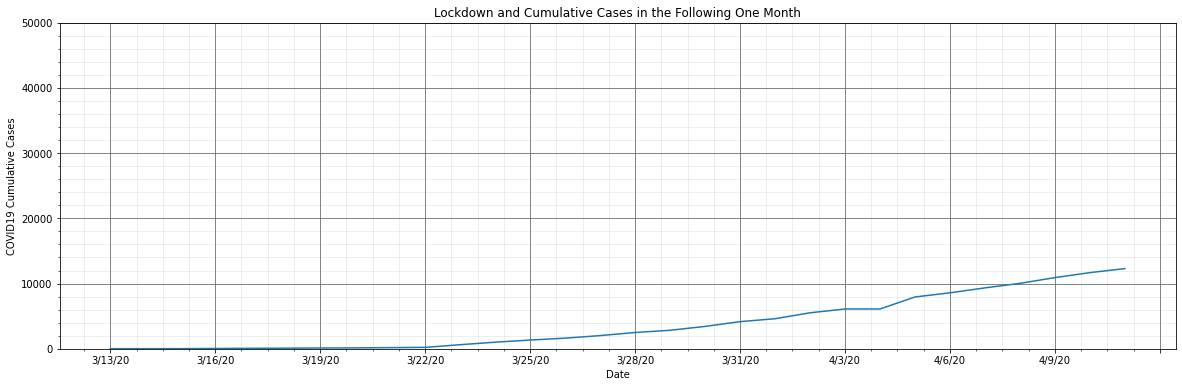

In [464]:
plt.figure(figsize=(20,6))
top_range = 50000
plt.ylim([0, top_range])
plt.plot(QuebecConfirm.iloc[0][51:81])
tick_spacing = 3
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.title('Lockdown and Cumulative Cases in the Following One Month')
plt.xlabel('Date')
plt.ylabel('COVID19 Cumulative Cases')
plt.show()

****
**The trend of COVID19 cumulative cases after lockdown in Quebec is similar to the best projection curve that get in Part 2. It tells that the lockdown policy is useful to control the COVID19 spread. Within one month, the total infection is under 15000 cases. This situation is not only depend on the lockdown policy, at the same time period, the flight cancellation begin and large event cancelled, etc. These policies also help to slow down the growth confirm cases.**
****

### Mask Require

**Date: 2020-7-13**

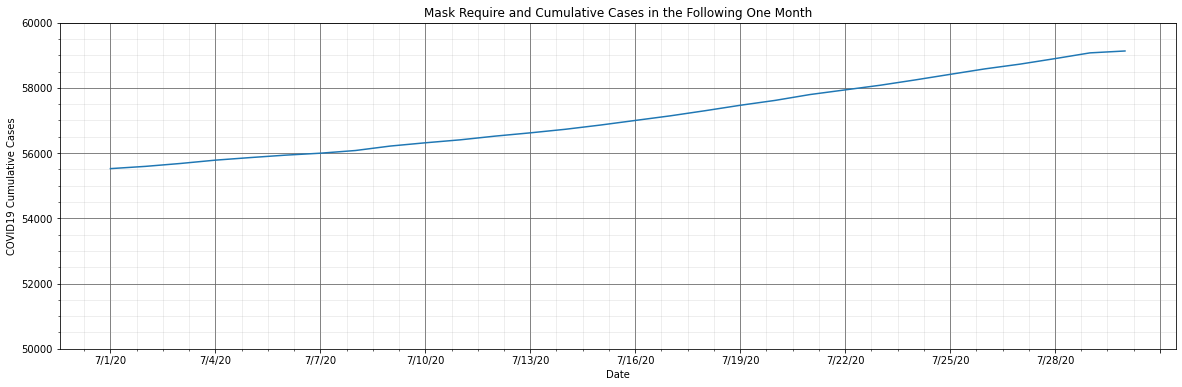

In [472]:
plt.figure(figsize=(20,6))
top_range = 60000
plt.ylim([50000, top_range])
plt.plot(QuebecConfirm.iloc[0][161:191])
tick_spacing = 3
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.title('Mask Require and Cumulative Cases in the Following One Month')
plt.xlabel('Date')
plt.ylabel('COVID19 Cumulative Cases')
plt.show()

****
**The trend of COVID19 cumulative cases after mask requirement in Quebec is similar to the best projection curve that get in Part 2. It tells that the mask requirement policy is useful to control the COVID19 spread. Within one month, the total infection within 15000 cases. But during this time, at Jun 25, CBC reported a News that "Quebec stops publishing daily COVID-19 data despite leading country in number of cases", so that the dataset in these period may not accuracy, part of confirm cases are not recorded.**
****

### Fine for Refuse Mask

**Date: 2020-9-10**

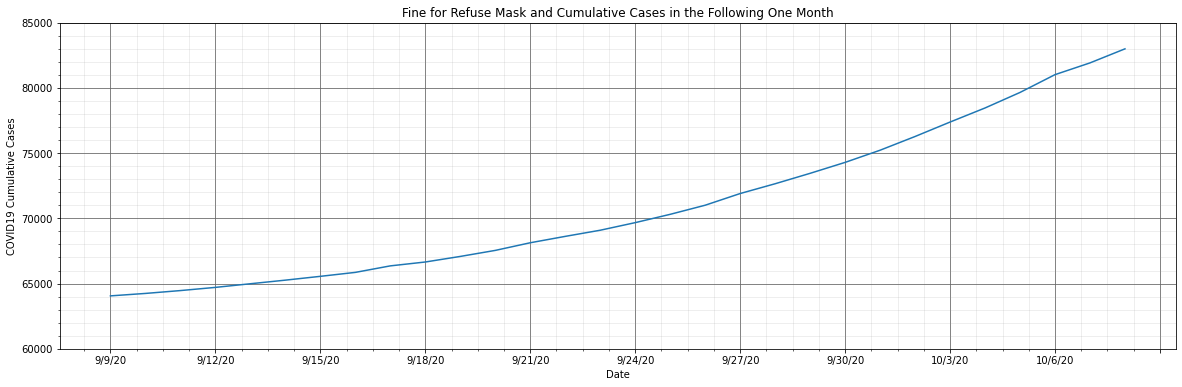

In [478]:
plt.figure(figsize=(20,6))
top_range = 85000
plt.ylim([60000, top_range])
plt.plot(QuebecConfirm.iloc[0][231:261])
tick_spacing = 3
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.title('Fine for Refuse Mask and Cumulative Cases in the Following One Month')
plt.xlabel('Date')
plt.ylabel('COVID19 Cumulative Cases')
plt.show()

****
**The trend of COVID19 cumulative cases after fine for refuse mask in Quebec is similar to the worst projection curve that get in Part 2. It tells that the fine for refuse mask policy is not useful to control the COVID19 spread compared to other policies. Within one month, the total infection close to 20000 cases and show a exponential increase trend. The social situations during these time, gather a crowd over 200 people is allowed, public entertainments are reopened. The policy published time is not at the correct point and other reopen policies effect the infection number.**
****

# 5 Deriving insights about policy and guidance to tackle the outbreak based on model findings

**Discussing and proposing how scientists, doctors, nurses, healthcare professionals, industry and governments can best use the insights from your analysis to assist in the fight against the COVID-19 pandemic.**

- In part 1,2,3 I am analyzing the COVID 19 cases in Canada and using SIR model to output three projections. The SIR model aims to predict the number of individuals who are susceptible to infection, are actively infected, or have recovered from infection at any given time. 
- The three projections are the worst case, basic case and best case. For worst case projection is shown that after a period of time, almost all popolation have been infected by COVID19. The basic case projection is similar with the actual cumulation curve, the difference between may due to the actual situation not comform to the assumption of the SIR. The best case projection is the incremental of infect cases shown a slow and steady trend, over a log period of time, the confirmed cases are still keeping in a low level.
  - The worst case happens when people do not care about COVID19, government do not implement any policies to protect people from the infectious discease, the result will be herd immunity. But lots of people will lose their life due to COVID 19.
  - The basic case happen for government promulgates policies to response it, but the start time, coordination of the people, weather condition, virus mutation rate, development in medical and technology, etc, are all related with the number of infection.
  - The best case happen for government promulgates effective policies in correct time slot, and all people follow the rules, new vaccine is developed to effective cure the disease. 

**Proposes:**
- When a new infectious disease begin to emerge, government should pay close attention to most poplous proviences, such as Ontario and Quebec in Canada, these two proviences have reported the majority of the infections. 
- Social distance is the key to control the epidemic and government should recommend the mask first to decrease the infective rate.
- The long term acre facilities should be able to protect their residents.
- Official should recognizing the seriousness of an infectious disease.
- Political and public health leadership has been crucial in engaging population.
- Social distancing, travel restrictions, increasing test, and tracing capacity and weiting to gradually open economy until there was a sustained reduction in the number of new cases.
- Industry should limit the number of people in a closed working environment and avoid workers overwork. For the industry related to food processind, they should take care with the food safety, since COVID19 can infect to raw meat and spread the diseases to people.
